In [1]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [12]:
model = Sequential()

#define 1st layear
model.add(Conv2D(200,(3,3),input_shape = data.shape[1:]))
#this CNN layer followed by Relu and Maxpooling layers.
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

#define 2nd layer
          
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation ='relu'))  
#Final layer with two outputs for two categories
model.add(Dense(2,activation = 'softmax'))
          
model.compile(loss='categorical_crossentropy',optimizer= 'adam', metrics=['accuracy'])


In [15]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data,target,test_size = 0.2)

In [17]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 132s 4s/step - accuracy: 0.5132 - loss: 0.7683 - val_accuracy: 0.4500 - val_loss: 0.7197
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 132s 5s/step - accuracy: 0.5534 - loss: 0.6812 - val_accuracy: 0.6909 - val_loss: 0.5960
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.7823 - loss: 0.4818 - val_accuracy: 0.8273 - val_loss: 0.3824
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 129s 5s/step - accuracy: 0.8328 - loss: 0.3652 - val_accuracy: 0.8636 - val_loss: 0.3591
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 133s 5s/step - accuracy: 0.8656 - loss: 0.3344 - val_accuracy: 0.8773 - val_loss: 0.2730
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 178s 6s/step - accuracy: 0.9222 - loss: 0.2169 - val_accuracy: 0.9091 - val_loss: 0.2325
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 203s 7s/step - accuracy: 0.9531 - loss: 0.1523 - val_accuracy: 0.8909 - val_loss: 0.2692
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 208s 7s/step - accuracy: 0.9444 - loss: 0.1348 - val_accuracy: 0.9273 - v

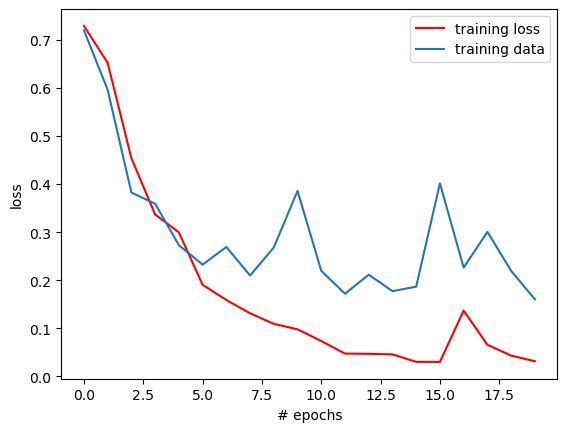

In [20]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='training data')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

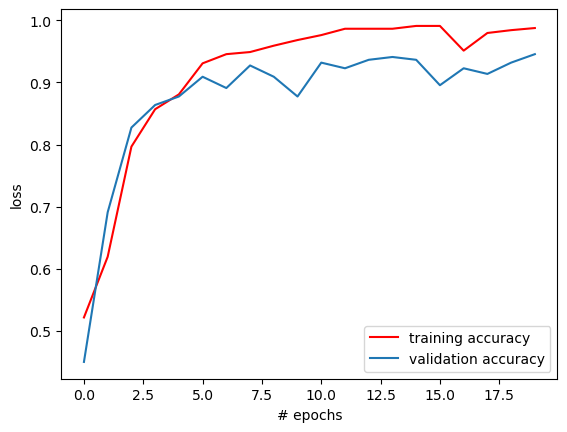

In [21]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
print(model.evaluate(test_data,test_target))

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 651ms/step - accuracy: 0.9584 - loss: 0.1675
[0.14523260295391083, 0.9637681245803833]
